# $\underline{\text{Evaluacion 3:}}$

$\textbf{Por Gustavo Medina}$
$\bigskip$

La Ecuación de Reacción-Difusión en una dimensión está dada por la ecuación diferencial parcial
$$\begin{equation*} \frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u) \end{equation*}$$

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos.

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo
$$\begin{equation*} 2 H_2 + O_2 \xrightarrow[\leftarrow]{} 2 H_2 O \end{equation*}$$

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, siendo $\alpha$ el coeficiente de reacción.

Entonces nos interesa resolver la ecuación
$$\begin{equation*} \frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u \end{equation*}$$

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor.

Supondremos que $D=1$ y $\alpha=-1$.

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$ en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura

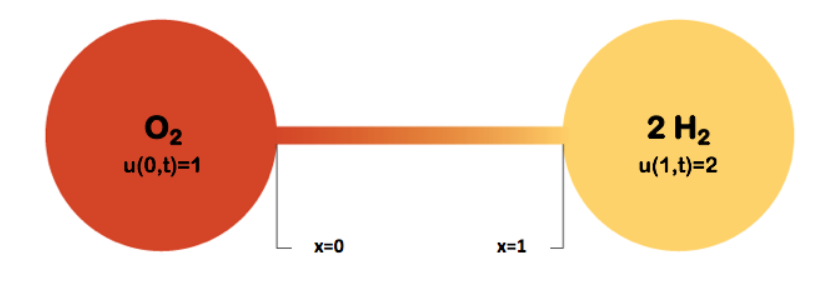

Se pide adaptar el código desarrolado en el sitio del curso de Numerical Methods using Python del Dr. Vivi Andasari de la Universidad de Boston.

En la sesión 15, se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS). Se provee el código para problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann.

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.


In [1]:
#Bibliotecas que se utilizaran:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from matplotlib import cm
import matplotlib.pyplot as plt


# $\underline{\text{Problema 1:}}$



Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.


True


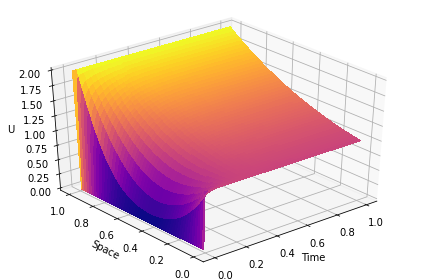

In [21]:
#Primero vamos a hacer el metodo de diferencias finitas tipo Dirichlet:

#------NUMERO DE PASOS------
#Intervalo espacial:
M = 100
#Intervalo temporal:
N = 110


#x inicial:
x0 = 0
#Longitud del tubo:
xl = 1

#---- SPATIAL DISCRETIZATION STEP ----
#Tamano de paso
dx = (xl - x0)/(M - 1)

#----INTERVALO DE TIEMPO----
#Tiempo inicial:
t0 = 0.0
#Tiempo final:
tf = 1.0


#----TIME STEP----
#Tamano de paso en t:
dt = (tf - t0)/(N - 1)

#Coeficiente de difusion:
D = 1.0
#Razon de raccion:
alpha = -1.0

r = dt*D/dx**2
s = dt*alpha;

#Vector espacial
xspan = np.linspace(x0, xl, M)
#Vector temporal
tspan = np.linspace(t0, tf, N)

main_diag = (1+2*r-s)*np.ones((1, M-2))
off_diag = -r*np.ones((1, M-3))
a = main_diag.shape[1]
diagonals = [main_diag, off_diag, off_diag]
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

#----INITIALIZES MATRIX U----
U = np.zeros((M, N))

#----INITIAL CONDITION----
#Condiciones iniciales:
U[:,0] = 0.0

#---- DIRICHLET BOUNDARY CONDITIONS ----
#Condiciones de frontera:
U[0,:] = 1.0
U[-1,:] = 2.0

#Loop resolucion:
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

#----CHECKS IF THE SOLUTION IS CORRECT:----
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

#----SURFACE PLOT----
X, T = np.meshgrid(tspan,xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0, cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(35, -130)
plt.tight_layout()
plt.show()

$\underline{\text{COMENTARIOS:}}$

Lo que podemos observar es que el tubo comienza en 0 (Es decir: $U$, la concentracion del compuesto quimico, es 0), algo que apenas se alcanza a observar ya que se ve la linea del tiempo $t$=0.0. Inmediatamente despues podemos ver que del lado $x$=1.0 hay dos particulas y del lado $x$=0.0 hay una. Despues de esto, parece mostrar que el tubo comienza a llenarse de ambos lados hasta llegar a una concentracion aparentemente estable.



# $\underline{\text{Problema 2:}}$

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


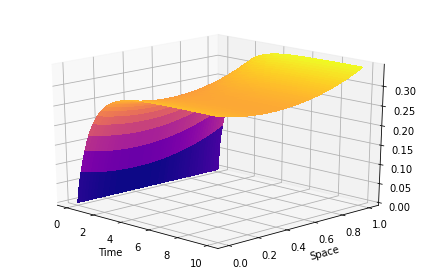

In [22]:
#Ahora lo unico que debemos de hacer realmente es cambiar algunos valores al codigo anterior:

#----NUMERO DE PASOS----
#Intervalo espacial:
M = 50 
#Intervalo temporal
N = 60

#Intervalo en x
#x inicial:
x0 = 0
#Longitud del tubo
xL = 1

# -----SPACIAL DISCRETIZATION STEP-----
#Tamano de paso en x:
dx = (xl - x0)/(M - 1)

#Intervalo de tiempo
#t inicial
t0 = 0.0
#t final
tf = 10.0 #40.0 (Quise ver que tanto se estabilizaba)

# -----TIME STEP-----
#Tamano de paso en t:
dt = (tf - t0)/(N - 1)

#Coeficiente de difusion:
D = 1.0  
#Razon de reaccion:
alpha = -1.0 

r = dt*D/dx**2
s = dt*alpha;

#Vector en x:
xspan = np.linspace(x0, xl, M)
#Vector en t:
tspan = np.linspace(t0, tf, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))
a = main_diag.shape[1]
diagonals = [main_diag, off_diag, off_diag]
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# -----INITIALIZES MATRIX U-----
U = np.zeros((M, N))

#-----INITIAL CONDITION-----
#Condiciones iniciales del problema: 
U[:,0] = 0.0

#-----NEUMAN BOUNDARY CONDITIONS-----
#PAra que sea del mismo tamano que leftBC:
w = 0.1*np.ones([N +1,1])
#Lo mismo para rightBC
z = 0.2 *np.ones([N+1,1])

#Loop resolucion del sistema
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*w[k], 2*r*dx*z[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# -----CHECKS IF THE SOLUTION IS CORRECT----
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(20, -45)
plt.tight_layout()
plt.show()

$\underline{\text{COMENTARIOS:}}$

Lo que se puede apreciar es como el tubo se comienza a llenar de concentracion muy rapidamente. Sin embargo, podemos ver aun como el lado $x$=1.0 se comienza a llenar mas rapido de concentracion que el otro lado, aunque no por mucho. Despues de un tiempo la concentracion comienza a estabilizarse.

# $\underline{\text{Problema 3:}}$

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


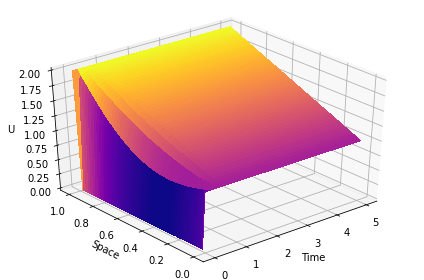

In [19]:
#Ahora lo unico que debemos de hacer realmente es cambiar algunos valores al codigo anterior:

#----NUMERO DE PASOS----
#Intervalo espacial:
M = 50 
#Intervalo temporal
N = 60

#Intervalo en x
#x inicial:
x0 = 0
#Longitud del tubo
xl = 1

# -----SPACIAL DISCRETIZATION STEP-----
#Tamaño de paso en x:
dx = (xl - x0)/(M - 1)

#Intervalo de tiempo
#t inicial
t0 = 0.0
#t final
tf = 5.0 #40.0 (Quise ver que tanto se estabilizaba)

# -----TIME STEP-----
#Tamaño de paso en t:
dt = (tf - t0)/(N - 1)

#Coeficiente de difusion:
D = 1.0  
#Razón de reaccion:
alpha = 0 

r = dt*D/dx**2
s = dt*alpha;

#Vector en x:
xspan = np.linspace(x0, xl, M)
#Vector en t:
tspan = np.linspace(t0, tf, N)

main_diag = (1+2*r-s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))
a = main_diag.shape[1]
diagonals = [main_diag, off_diag, off_diag]
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()


# -----INITIALIZES MATRIX U-----
U = np.zeros((M, N))

#-----INITIAL CONDITION-----
#Condiciones iniciales del problema: 
U[:,0] = 0.0

#-----DIRICHLET BOUNDARY CONDITIONS-----
#Condiciones de frontera del problema:
U[0,:] = 1.0
U[-1,:] = 2.0

#Loop resolucion del sistema
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# -----CHECKS IF THE SOLUTION IS CORRECT----
gc = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.plasma, antialiased=False)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(35, -130)
plt.tight_layout()
plt.show()

$\underline{\text{COMENTARIOS:}}$

Primero que nada, debemos de recordar que tenemos un $\alpha$=0 en este ejercicio. Es necesario recordar esto porque es algo que pienso que es importante contrastar con otros ejemplos, ya que podemos observar que la estabilizacion es casi inmediata.

La concentracion empieza en 0 y muy rapidamente llega a $U=2$ en $x=1$ y a alrededor de $U=1$ en $x=0$. De hecho, tambien podemos ver que esta grafica se parece bastante a la del primer ejercicio, solo que probablemente por la escala de $t$ no se puede apreciar mucho la similitud. 